# Prediction Model for depression

In [31]:
import numpy as np
import pandas as pd

In [32]:
df = pd.read_csv("depressionData.csv")
df

,Timestamp,Age,Feeling sad,Irritable towards people,Trouble sleeping at night,Problems concentrating or making decision,loss of appetite,Feeling of guilt,Feeling anxious,Suicide attempt,Depressed
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,No,Yes,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,Yes,Yes,No,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,No,Sometimes,No,Yes
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Maybe,No,No,Yes
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1498,6/15/2022 0:35,30-35,Yes,No,Two or more days a week,No,No,Maybe,Sometimes,No,Yes
1499,6/15/2022 0:35,25-30,Sometimes,No,No,Often,No,Maybe,Yes,No,Yes
1500,6/15/2022 0:35,25-30,No,Sometimes,Two or more days a week,No,No,Yes,No,Not interested to say,No
1501,6/15/2022 0:36,25-30,No,Sometimes,Yes,Often,No,No,No,No,Yes


In [33]:
df.shape

(1503, 11)

In [34]:
df.head()

,Timestamp,Age,Feeling sad,Irritable towards people,Trouble sleeping at night,Problems concentrating or making decision,loss of appetite,Feeling of guilt,Feeling anxious,Suicide attempt,Depressed
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,No,Yes,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,Yes,Yes,No,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,No,Sometimes,No,Yes
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Maybe,No,No,Yes
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,No,Yes,No,Yes


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  1503 non-null   object
 1   Age                                        1503 non-null   object
 2   Feeling sad                                1503 non-null   object
 3   Irritable towards people                   1497 non-null   object
 4   Trouble sleeping at night                  1503 non-null   object
 5   Problems concentrating or making decision  1491 non-null   object
 6   loss of appetite                           1503 non-null   object
 7   Feeling of guilt                           1494 non-null   object
 8   Feeling anxious                            1503 non-null   object
 9   Suicide attempt                            1503 non-null   object
 10  Depressed                           

In [36]:
df.describe()

,Timestamp,Age,Feeling sad,Irritable towards people,Trouble sleeping at night,Problems concentrating or making decision,loss of appetite,Feeling of guilt,Feeling anxious,Suicide attempt,Depressed
count,1503,1503,1503,1497,1503,1491,1503,1494,1503,1503,1503
unique,90,5,3,3,3,3,3,3,3,3,2
top,6/15/2022 22:24,40-45,Yes,Yes,Two or more days a week,No,No,No,No,No,Yes
freq,51,364,536,555,640,583,841,624,557,709,980


# Data Cleaning

In [37]:
df.isnull().sum()

Timestamp                                     0
Age                                           0
Feeling sad                                   0
Irritable towards people                      6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
loss of appetite                              0
Feeling of guilt                              9
Feeling anxious                               0
Suicide attempt                               0
Depressed                                     0
dtype: int64

In [38]:
#filling all the missing values with the next available values
df['Irritable towards people'] = df['Irritable towards people'].fillna(method = 'bfill')
df['Problems concentrating or making decision'] = df['Problems concentrating or making decision'].fillna(method = 'bfill')
df['Feeling of guilt'] = df['Feeling of guilt'].fillna(method = 'bfill')

In [39]:
df.isnull().sum()

Timestamp                                    0
Age                                          0
Feeling sad                                  0
Irritable towards people                     0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
loss of appetite                             0
Feeling of guilt                             0
Feeling anxious                              0
Suicide attempt                              0
Depressed                                    0
dtype: int64

In [40]:
df = df.dropna()

In [41]:
df.shape

(1503, 11)

In [42]:
df

,Timestamp,Age,Feeling sad,Irritable towards people,Trouble sleeping at night,Problems concentrating or making decision,loss of appetite,Feeling of guilt,Feeling anxious,Suicide attempt,Depressed
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,No,Yes,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,Yes,Yes,No,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,No,Sometimes,No,Yes
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Maybe,No,No,Yes
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1498,6/15/2022 0:35,30-35,Yes,No,Two or more days a week,No,No,Maybe,Sometimes,No,Yes
1499,6/15/2022 0:35,25-30,Sometimes,No,No,Often,No,Maybe,Yes,No,Yes
1500,6/15/2022 0:35,25-30,No,Sometimes,Two or more days a week,No,No,Yes,No,Not interested to say,No
1501,6/15/2022 0:36,25-30,No,Sometimes,Yes,Often,No,No,No,No,Yes


In [43]:
df = df.drop(['Timestamp'], axis = 1)
df

,Age,Feeling sad,Irritable towards people,Trouble sleeping at night,Problems concentrating or making decision,loss of appetite,Feeling of guilt,Feeling anxious,Suicide attempt,Depressed
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,No,Yes,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,Yes,Yes,No,No
2,35-40,Yes,No,Yes,Yes,Yes,No,Sometimes,No,Yes
3,35-40,Yes,Yes,Yes,Yes,No,Maybe,No,No,Yes
4,40-45,Yes,No,Two or more days a week,Yes,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,Yes,No,Two or more days a week,No,No,Maybe,Sometimes,No,Yes
1499,25-30,Sometimes,No,No,Often,No,Maybe,Yes,No,Yes
1500,25-30,No,Sometimes,Two or more days a week,No,No,Yes,No,Not interested to say,No
1501,25-30,No,Sometimes,Yes,Often,No,No,No,No,Yes


# Data Visualization

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df["Trouble sleeping at night"].value_counts()

Two or more days a week    640
Yes                        445
No                         418
Name: Trouble sleeping at night, dtype: int64

In [46]:
df["Feeling sad"].value_counts()

Yes          536
No           524
Sometimes    443
Name: Feeling sad, dtype: int64

In [47]:
df["Irritable towards people"].value_counts()

Yes          561
No           499
Sometimes    443
Name: Irritable towards people, dtype: int64

In [48]:
df["Problems concentrating or making decision"].value_counts()

No       583
Often    473
Yes      447
Name: Problems concentrating or making decision, dtype: int64

In [49]:
df["loss of appetite"].value_counts()

No            841
Yes           343
Not at all    319
Name: loss of appetite, dtype: int64

In [50]:
df["Feeling of guilt"].value_counts()

No       633
Maybe    528
Yes      342
Name: Feeling of guilt, dtype: int64

In [51]:
df["Feeling anxious"].value_counts()

No           557
Sometimes    542
Yes          404
Name: Feeling anxious, dtype: int64

In [52]:
df["Suicide attempt"].value_counts()

No                       709
Yes                      459
Not interested to say    335
Name: Suicide attempt, dtype: int64

In [53]:
df["Depressed"].value_counts()

Yes    980
No     523
Name: Depressed, dtype: int64

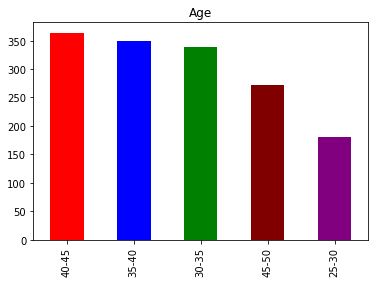

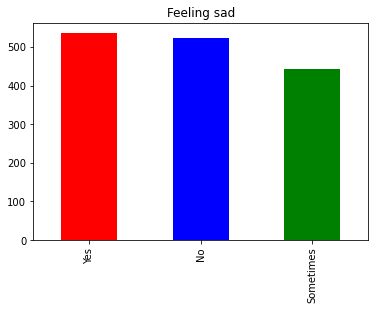

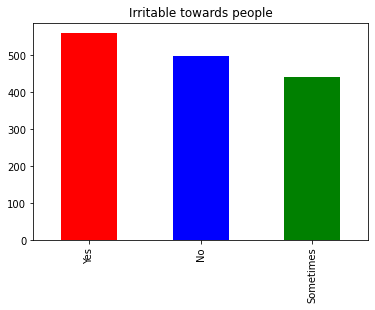

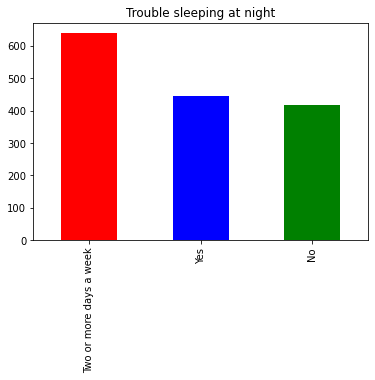

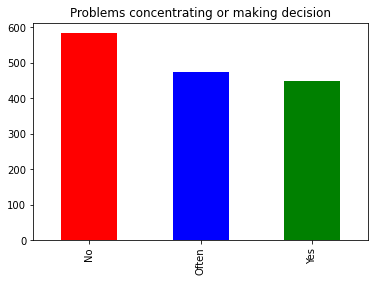

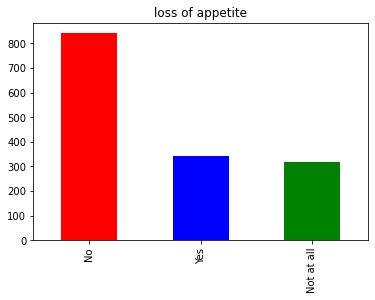

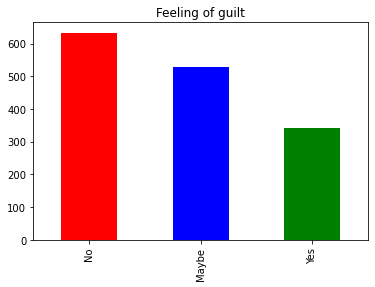

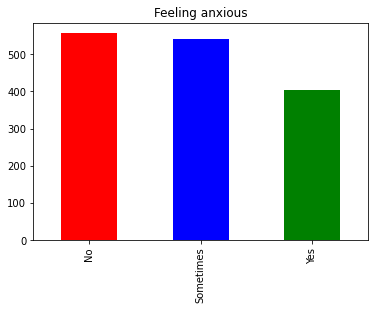

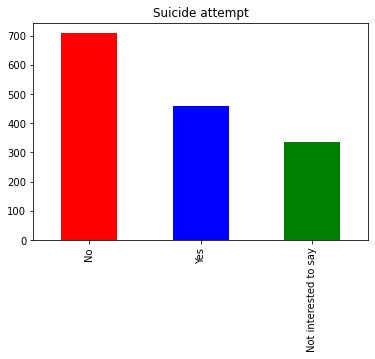

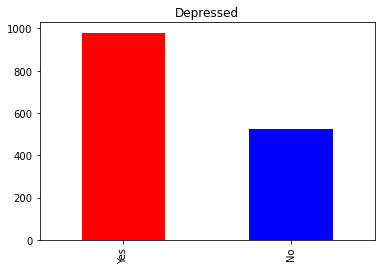

In [54]:
# Iterate through all columns
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is categorical
        counts = df[col].value_counts()  # Get value counts of column
        counts.plot.bar(color=['red', 'blue', 'green', 'maroon', 'purple'])  # Generate a bar plot of value counts
        plt.title(col)  # Set the title of the plot to the column name
        plt.show()  # Show the plot

In [55]:
df['Feeling sad'].unique()

array(['Yes', 'No', 'Sometimes'], dtype=object)

In [56]:
ordinal=['Yes', 'No', 'Sometimes']

# Data Preprocessing

In [57]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Feeling sad']])

OrdinalEncoder(categories=[['Yes', 'No', 'Sometimes']])

In [58]:
final=pd.DataFrame(ord.fit_transform(df[['Feeling sad']]))
final

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1498,0.0
1499,2.0
1500,1.0
1501,1.0


In [59]:
df['Feeling sad']=final
df

,Age,Feeling sad,Irritable towards people,Trouble sleeping at night,Problems concentrating or making decision,loss of appetite,Feeling of guilt,Feeling anxious,Suicide attempt,Depressed
0,35-40,0.0,Yes,Two or more days a week,Yes,Yes,No,Yes,Yes,Yes
1,40-45,0.0,No,No,Yes,Yes,Yes,Yes,No,No
2,35-40,0.0,No,Yes,Yes,Yes,No,Sometimes,No,Yes
3,35-40,0.0,Yes,Yes,Yes,No,Maybe,No,No,Yes
4,40-45,0.0,No,Two or more days a week,Yes,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,0.0,No,Two or more days a week,No,No,Maybe,Sometimes,No,Yes
1499,25-30,2.0,No,No,Often,No,Maybe,Yes,No,Yes
1500,25-30,1.0,Sometimes,Two or more days a week,No,No,Yes,No,Not interested to say,No
1501,25-30,1.0,Sometimes,Yes,Often,No,No,No,No,Yes


In [60]:
df['Irritable towards people'].unique()

array(['Yes', 'No', 'Sometimes'], dtype=object)

In [61]:
ordinal=['Yes', 'No', 'Sometimes']

In [62]:
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Irritable towards people']])

OrdinalEncoder(categories=[['Yes', 'No', 'Sometimes']])

In [63]:
OrdinalEncoder(categories=[['Yes', 'No', 'Sometimes']])

OrdinalEncoder(categories=[['Yes', 'No', 'Sometimes']])

In [64]:
final2=pd.DataFrame(ord.fit_transform(df[['Irritable towards people']]))
final2

,0
0,0.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
1498,1.0
1499,1.0
1500,2.0
1501,2.0


In [65]:
df['Irritable towards people']=final2
df

,Age,Feeling sad,Irritable towards people,Trouble sleeping at night,Problems concentrating or making decision,loss of appetite,Feeling of guilt,Feeling anxious,Suicide attempt,Depressed
0,35-40,0.0,0.0,Two or more days a week,Yes,Yes,No,Yes,Yes,Yes
1,40-45,0.0,1.0,No,Yes,Yes,Yes,Yes,No,No
2,35-40,0.0,1.0,Yes,Yes,Yes,No,Sometimes,No,Yes
3,35-40,0.0,0.0,Yes,Yes,No,Maybe,No,No,Yes
4,40-45,0.0,1.0,Two or more days a week,Yes,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,0.0,1.0,Two or more days a week,No,No,Maybe,Sometimes,No,Yes
1499,25-30,2.0,1.0,No,Often,No,Maybe,Yes,No,Yes
1500,25-30,1.0,2.0,Two or more days a week,No,No,Yes,No,Not interested to say,No
1501,25-30,1.0,2.0,Yes,Often,No,No,No,No,Yes


In [66]:
df['Trouble sleeping at night'].unique()

array(['Two or more days a week', 'No', 'Yes'], dtype=object)

In [67]:
ordinal=['Two or more days a week', 'No', 'Yes']
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Trouble sleeping at night']])
final3=pd.DataFrame(ord.fit_transform(df[['Trouble sleeping at night']]))
final3

,0
0,0.0
1,1.0
2,2.0
3,2.0
4,0.0
...,...
1498,0.0
1499,1.0
1500,0.0
1501,2.0


In [68]:
df['Trouble sleeping at night']=final3
df

,Age,Feeling sad,Irritable towards people,Trouble sleeping at night,Problems concentrating or making decision,loss of appetite,Feeling of guilt,Feeling anxious,Suicide attempt,Depressed
0,35-40,0.0,0.0,0.0,Yes,Yes,No,Yes,Yes,Yes
1,40-45,0.0,1.0,1.0,Yes,Yes,Yes,Yes,No,No
2,35-40,0.0,1.0,2.0,Yes,Yes,No,Sometimes,No,Yes
3,35-40,0.0,0.0,2.0,Yes,No,Maybe,No,No,Yes
4,40-45,0.0,1.0,0.0,Yes,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,0.0,1.0,0.0,No,No,Maybe,Sometimes,No,Yes
1499,25-30,2.0,1.0,1.0,Often,No,Maybe,Yes,No,Yes
1500,25-30,1.0,2.0,0.0,No,No,Yes,No,Not interested to say,No
1501,25-30,1.0,2.0,2.0,Often,No,No,No,No,Yes


In [69]:
df['Problems concentrating or making decision'].unique()

array(['Yes', 'No', 'Often'], dtype=object)

In [70]:
ordinal=['Yes', 'No', 'Often']
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Problems concentrating or making decision']])
final4=pd.DataFrame(ord.fit_transform(df[['Problems concentrating or making decision']]))
final4

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1498,1.0
1499,2.0
1500,1.0
1501,2.0


In [71]:
df['Problems concentrating or making decision']=final4
df

,Age,Feeling sad,Irritable towards people,Trouble sleeping at night,Problems concentrating or making decision,loss of appetite,Feeling of guilt,Feeling anxious,Suicide attempt,Depressed
0,35-40,0.0,0.0,0.0,0.0,Yes,No,Yes,Yes,Yes
1,40-45,0.0,1.0,1.0,0.0,Yes,Yes,Yes,No,No
2,35-40,0.0,1.0,2.0,0.0,Yes,No,Sometimes,No,Yes
3,35-40,0.0,0.0,2.0,0.0,No,Maybe,No,No,Yes
4,40-45,0.0,1.0,0.0,0.0,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,0.0,1.0,0.0,1.0,No,Maybe,Sometimes,No,Yes
1499,25-30,2.0,1.0,1.0,2.0,No,Maybe,Yes,No,Yes
1500,25-30,1.0,2.0,0.0,1.0,No,Yes,No,Not interested to say,No
1501,25-30,1.0,2.0,2.0,2.0,No,No,No,No,Yes


In [72]:
df['loss of appetite'].unique()

array(['Yes', 'No', 'Not at all'], dtype=object)

In [73]:
ordinal=['Yes', 'No', 'Not at all']
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['loss of appetite']])
final5=pd.DataFrame(ord.fit_transform(df[['loss of appetite']]))
final5

,0
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
1498,1.0
1499,1.0
1500,1.0
1501,1.0


In [74]:
df['loss of appetite']=final5
df

,Age,Feeling sad,Irritable towards people,Trouble sleeping at night,Problems concentrating or making decision,loss of appetite,Feeling of guilt,Feeling anxious,Suicide attempt,Depressed
0,35-40,0.0,0.0,0.0,0.0,0.0,No,Yes,Yes,Yes
1,40-45,0.0,1.0,1.0,0.0,0.0,Yes,Yes,No,No
2,35-40,0.0,1.0,2.0,0.0,0.0,No,Sometimes,No,Yes
3,35-40,0.0,0.0,2.0,0.0,1.0,Maybe,No,No,Yes
4,40-45,0.0,1.0,0.0,0.0,1.0,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,0.0,1.0,0.0,1.0,1.0,Maybe,Sometimes,No,Yes
1499,25-30,2.0,1.0,1.0,2.0,1.0,Maybe,Yes,No,Yes
1500,25-30,1.0,2.0,0.0,1.0,1.0,Yes,No,Not interested to say,No
1501,25-30,1.0,2.0,2.0,2.0,1.0,No,No,No,Yes


In [75]:
df['Feeling of guilt'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [76]:
ordinal=['No', 'Yes', 'Maybe']
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Feeling of guilt']])

OrdinalEncoder(categories=[['No', 'Yes', 'Maybe']])

In [77]:
final6=pd.DataFrame(ord.fit_transform(df[['Feeling of guilt']]))
final6

,0
0,0.0
1,1.0
2,0.0
3,2.0
4,0.0
...,...
1498,2.0
1499,2.0
1500,1.0
1501,0.0


In [78]:
df['Feeling of guilt']=final6
df

,Age,Feeling sad,Irritable towards people,Trouble sleeping at night,Problems concentrating or making decision,loss of appetite,Feeling of guilt,Feeling anxious,Suicide attempt,Depressed
0,35-40,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,Yes
1,40-45,0.0,1.0,1.0,0.0,0.0,1.0,Yes,No,No
2,35-40,0.0,1.0,2.0,0.0,0.0,0.0,Sometimes,No,Yes
3,35-40,0.0,0.0,2.0,0.0,1.0,2.0,No,No,Yes
4,40-45,0.0,1.0,0.0,0.0,1.0,0.0,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,0.0,1.0,0.0,1.0,1.0,2.0,Sometimes,No,Yes
1499,25-30,2.0,1.0,1.0,2.0,1.0,2.0,Yes,No,Yes
1500,25-30,1.0,2.0,0.0,1.0,1.0,1.0,No,Not interested to say,No
1501,25-30,1.0,2.0,2.0,2.0,1.0,0.0,No,No,Yes


In [79]:
df['Feeling anxious'].unique()

array(['Yes', 'Sometimes', 'No'], dtype=object)

In [80]:
ordinal=['Yes', 'Sometimes', 'No']
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Feeling anxious']])
final7=pd.DataFrame(ord.fit_transform(df[['Feeling anxious']]))
final7

,0
0,0.0
1,0.0
2,1.0
3,2.0
4,0.0
...,...
1498,1.0
1499,0.0
1500,2.0
1501,2.0


In [81]:
df['Feeling anxious']=final7
df

,Age,Feeling sad,Irritable towards people,Trouble sleeping at night,Problems concentrating or making decision,loss of appetite,Feeling of guilt,Feeling anxious,Suicide attempt,Depressed
0,35-40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes
1,40-45,0.0,1.0,1.0,0.0,0.0,1.0,0.0,No,No
2,35-40,0.0,1.0,2.0,0.0,0.0,0.0,1.0,No,Yes
3,35-40,0.0,0.0,2.0,0.0,1.0,2.0,2.0,No,Yes
4,40-45,0.0,1.0,0.0,0.0,1.0,0.0,0.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,0.0,1.0,0.0,1.0,1.0,2.0,1.0,No,Yes
1499,25-30,2.0,1.0,1.0,2.0,1.0,2.0,0.0,No,Yes
1500,25-30,1.0,2.0,0.0,1.0,1.0,1.0,2.0,Not interested to say,No
1501,25-30,1.0,2.0,2.0,2.0,1.0,0.0,2.0,No,Yes


In [82]:
df['Age'].unique()

array(['35-40', '40-45', '30-35', '45-50', '25-30'], dtype=object)

In [83]:
ordinal=['35-40', '40-45', '30-35', '45-50', '25-30']
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Age']])
final8=pd.DataFrame(ord.fit_transform(df[['Age']]))
final8

,0
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
1498,2.0
1499,4.0
1500,4.0
1501,4.0


In [84]:
df['Age']=final8
df

,Age,Feeling sad,Irritable towards people,Trouble sleeping at night,Problems concentrating or making decision,loss of appetite,Feeling of guilt,Feeling anxious,Suicide attempt,Depressed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes
1,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,No,No
2,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,No,Yes
3,0.0,0.0,0.0,2.0,0.0,1.0,2.0,2.0,No,Yes
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...
1498,2.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,No,Yes
1499,4.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0,No,Yes
1500,4.0,1.0,2.0,0.0,1.0,1.0,1.0,2.0,Not interested to say,No
1501,4.0,1.0,2.0,2.0,2.0,1.0,0.0,2.0,No,Yes


In [85]:
df['Suicide attempt'].unique()

array(['Yes', 'No', 'Not interested to say'], dtype=object)

In [86]:
ordinal=['Yes', 'No', 'Not interested to say']
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Suicide attempt']])
final9=pd.DataFrame(ord.fit_transform(df[['Suicide attempt']]))
final9

,0
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1498,1.0
1499,1.0
1500,2.0
1501,1.0


In [87]:
df['Suicide attempt']=final9
df

,Age,Feeling sad,Irritable towards people,Trouble sleeping at night,Problems concentrating or making decision,loss of appetite,Feeling of guilt,Feeling anxious,Suicide attempt,Depressed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
1,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,No
2,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,Yes
3,0.0,0.0,0.0,2.0,0.0,1.0,2.0,2.0,1.0,Yes
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,Yes
...,...,...,...,...,...,...,...,...,...,...
1498,2.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,Yes
1499,4.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0,1.0,Yes
1500,4.0,1.0,2.0,0.0,1.0,1.0,1.0,2.0,2.0,No
1501,4.0,1.0,2.0,2.0,2.0,1.0,0.0,2.0,1.0,Yes


In [88]:
df['Depressed'].unique()

array(['Yes', 'No'], dtype=object)

In [89]:
ordinal=['Yes', 'No']
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Depressed']])
final10=pd.DataFrame(ord.fit_transform(df[['Depressed']]))
final10

,0
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
1498,0.0
1499,0.0
1500,1.0
1501,0.0


In [90]:
df['Depressed']=final10
df

,Age,Feeling sad,Irritable towards people,Trouble sleeping at night,Problems concentrating or making decision,loss of appetite,Feeling of guilt,Feeling anxious,Suicide attempt,Depressed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
2,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,2.0,0.0,1.0,2.0,2.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1498,2.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0
1499,4.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0
1500,4.0,1.0,2.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0
1501,4.0,1.0,2.0,2.0,2.0,1.0,0.0,2.0,1.0,0.0


<AxesSubplot:>

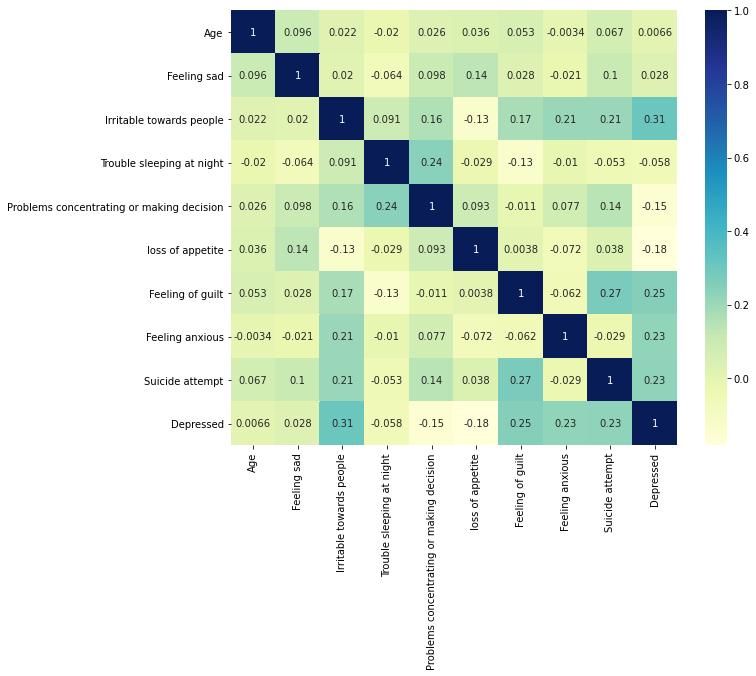

In [91]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap="YlGnBu" )

In [92]:
'''from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
x=df[df.columns[:9]]
y=df["Depressed"]
clf.fit(x,y)
feature_imp = pd.DataFrame(clf.feature_importances_,index=x.columns)
feature_imp.sort_values(by = 0 , ascending = False)'''

'from sklearn.ensemble import RandomForestClassifier\nclf = RandomForestClassifier()\nx=df[df.columns[:9]]\ny=df["Depressed"]\nclf.fit(x,y)\nfeature_imp = pd.DataFrame(clf.feature_importances_,index=x.columns)\nfeature_imp.sort_values(by = 0 , ascending = False)'

# Splitting Data

splitting data into dependent and independent variables

In [93]:
X= df[["Irritable towards people",'Trouble sleeping at night','Feeling sad','Feeling of guilt','Feeling anxious',"Problems concentrating or making decision","Suicide attempt"]]
y =df["Depressed"]

In [94]:
X

,Irritable towards people,Trouble sleeping at night,Feeling sad,Feeling of guilt,Feeling anxious,Problems concentrating or making decision,Suicide attempt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,2.0,0.0,0.0,1.0,0.0,1.0
3,0.0,2.0,0.0,2.0,2.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
1498,1.0,0.0,0.0,2.0,1.0,1.0,1.0
1499,1.0,1.0,2.0,2.0,0.0,2.0,1.0
1500,2.0,0.0,1.0,1.0,2.0,1.0,2.0
1501,2.0,2.0,1.0,0.0,2.0,2.0,1.0


In [95]:
y

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1498    0.0
1499    0.0
1500    1.0
1501    0.0
1502    1.0
Name: Depressed, Length: 1503, dtype: float64

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [97]:
clf = RandomForestClassifier()
x=df[df.columns[:9]]
y=df["Depressed"]
clf.fit(x,y)
feature_imp = pd.DataFrame(clf.feature_importances_,index=x.columns)
feature_imp.sort_values(by = 0 , ascending = False)

,0
Feeling of guilt,0.242454
Irritable towards people,0.139484
loss of appetite,0.103984
Feeling anxious,0.100148
Problems concentrating or making decision,0.099597
Suicide attempt,0.088700
Age,0.078968
Trouble sleeping at night,0.076719
Feeling sad,0.069946


Spitting the data into train and test

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regression Classifier

In [99]:
# Fit a Logistic Regression Classifier
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

# Predict using the Logistic Regression Classifier
y_pred_lr = lr.predict(X_test)

# Calculate the accuracy of the Logistic Regression Classifier
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.7807308970099668

# Decision Teee Classifier

In [100]:
# Fit a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Predict using the Decision Tree Classifier
y_pred_dt = dt.predict(X_test)

# Calculate the accuracy of the Decision Tree Classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.9501661129568106

# Random Forest Classifier

In [101]:
# Fit a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Predict using the Random Forest Classifier
y_pred_rf = rf.predict(X_test)

# Calculate the accuracy of the Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.9501661129568106

# K-Nearest Neighbour Classifier

In [102]:
# Fit a K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict using the K-Nearest Neighbors Classifier
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy of the K-Nearest Neighbors Classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.8837209302325582

# Support Vector Machine Classifier

In [103]:
# Fit a Support Vector Machine Classifier
svm = SVC(random_state=0)
svm.fit(X_train, y_train)

# Predict using the Support Vector Machine Classifier
y_pred_svm = svm.predict(X_test)

# Calculate the accuracy of the Support Vector Machine Classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

0.8770764119601329

Accurcy of all the classifiers in descending order

In [104]:
models = {
    "Random Forest": accuracy_rf,
    "Logistic Regression": accuracy_lr,
    "Decision Tree": accuracy_dt,
    "K-Nearest Neighbors": accuracy_knn,
    "Support Vector Machine": accuracy_svm
}

# Sort the models by accuracy
sorted_models = {k: v for k, v in sorted(models.items(), key=lambda item: item[1], reverse=True)}

# Print the accuracy of each model
for k, v in sorted_models.items():
    print(f"{k}: {v:.2f}")

Random Forest: 0.95
Decision Tree: 0.95
K-Nearest Neighbors: 0.88
Support Vector Machine: 0.88
Logistic Regression: 0.78


# Confusion Matrix

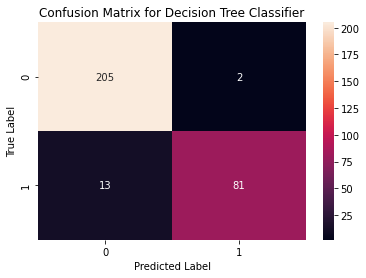

In [105]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

In [107]:
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))